In [2]:
%matplotlib inline
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import Data
x: Monthly average working hour   
y: Satisfactory level of employee

In [3]:
hr_data = pd.read_csv("HR_comma_sep.csv")
#satisfication_level
y = hr_data["satisfaction_level"]
x = hr_data["average_montly_hours"]
data = np.zeros(shape=(len(x), 2))
data[:,0] = x
data[:,1] = y

## Define Functions

graph_scatter : randomly sample data points from data sets and plot the line according to m and b on the same plot

compute_error : computer the MSE error of the line

step_gradient : calculate the gradient of m and b and descent the original values accordingly

descenter : run step_gradient for num_iterations to minimize the error

In [4]:
def graph_scatter(data, b, m, sample_size=100):
    """Plot a scatter plot and line plot according to the sample data and given line slope and bias
    
    Args:
        data: Input data
        b: bias
        m: slope
        sample_size(optional): size of sample to be drawn to plot

    Return:
        None
    """
    x = data[:,0]
    y = data[:,1]
    # randomly select index from the range of elements
    idx = np.random.choice(len(x), sample_size)
    
    # select the index 
    x_plot = x[idx]
    y_plot = y[idx]
    
    # plot the scatter plot
    plt.scatter(x_plot, y_plot, alpha=0.5)
    # generate x values for the line y=mx+b
    line_x = np.linspace(100,400, 4)
    line_y = m*line_x + b
    # plot the given line
    plt.plot(line_x, line_y)

    plt.show()

In [5]:
def compute_error(b, m, data):
    """Compute the MSE error given the weight and bias
    
    Args:
        b: bias
        m: weight
        data: Input data
    
    Return:
        error: MSE error
    """
    x = data[:,0]
    y = data[:,1]
    # get the predicted value
    pred_y = m*x+b
    # compute the Sum of Square error
    error = np.sum((y-pred_y)**2)
    # MSE
    error = error / float(len(x))
    return error

In [6]:
def step_gradient(b, m, data, learning_rate):
    """Compute the gradient of weight and bias for one step and update accordingly
    
    Args:
        b: bias
        m: weight
        data: Input data
        learning_rate: rate at which how fast gradient to descent
    
    Return:
        [b,m]: new bias and weight value after taken a step of gradient descent
    """
    # initialize gradients
    m_gradient = 0
    b_gradient = 0
    
    x = data[:,0]
    y = data[:,1]
    N = float(len(data))
    
    # compute the predicted value
    pred_y = m*x + b
    
    # compute the gradients
    b_gradient = np.sum(-(2/N)*(y - pred_y))
    m_gradient = np.sum(-(2/N)* x * (y - pred_y))
    
    # update to new value
    new_b = b - learning_rate*b_gradient
    new_m = m - learning_rate*m_gradient
    
    return [new_b, new_m]

In [7]:
def descenter(data, starting_b, starting_m, learning_rate, num_iteration):
    """Run step_gradient num of iteration of times
    
    Args:
        data: Input data
        starting_b: initial value of bias
        starting_m: initial value of weight
        learning_rate: rate at which how fast gradient to descent
        num_iteration: number of iteration to run step gradient
    
    Return:
        [b,m]: updated bias and weight value after num_iteration of gradient 
    """
    # get the inital values
    m = starting_m
    b = starting_b
    
    # loop through num of iteration of step gradient
    for i in range(num_iteration):
        [b,m]= step_gradient(b,m,data,learning_rate)
    return [b,m]

### Initilize weight and bias values

In [8]:
starting_b = 0
starting_m = 0
print "Starting gradient descent at b = {}, m = {}, err={}".format(starting_b, starting_m, compute_error(starting_b, starting_m,data))

Starting gradient descent at b = 0, m = 0, err=0.4373780052


### Plot sample data and y = 0

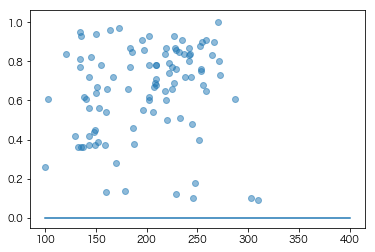

In [9]:
# plot the current plot
graph_scatter(data, starting_b, starting_m)

### Run Gradient Descent

In [10]:
learning_rate = 0.00001
num_iteration = 10000
[b,m] = descenter(data, starting_b, starting_m, learning_rate, num_iteration)
print [b,m]

[0.0073270640158635244, 0.0028308850018918608]


### Check Error and plot the new line

In [11]:
print "Descented at b = {}, m = {}, err={}".format(b, m, compute_error(b, m, data))

Descented at b = 0.00732706401586, m = 0.00283088500189, err=0.0845320879693


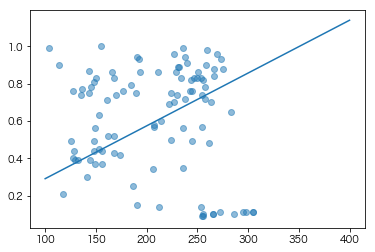

In [12]:
graph_scatter(data, b, m)

## Notes:
The resulting graph is not very intutive to me. Since it's a graph on the relationship between working hour and satisfactory level, I find it hard to believe the correlation is positive. One explanation is that gradient descent stuck in another local minima. To check my intuition, I re-initialize the starting weight and bias to have negative slope

### Initilize weight and bias at different points

Starting gradient descent at b = 1, m = -0.001, err=0.0984485869725


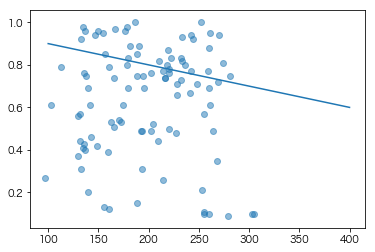

In [13]:
starting_b = 1
starting_m = -0.001
print "Starting gradient descent at b = {}, m = {}, err={}".format(starting_b, starting_m, compute_error(starting_b, starting_m,data))
graph_scatter(data, starting_b, starting_m)

### Run Gradient Descent

In [14]:
learning_rate = 0.00001
num_iteration = 10000
[b,m] = descenter(data, starting_b, starting_m, learning_rate, num_iteration)
print [b,m]

[0.99575398329639786, -0.0017997115812232053]


### Check error and plot the resulted line

In [15]:
print "Descented at b = {}, m = {}, err={}".format(b, m, compute_error(b, m, data))

Descented at b = 0.995753983296, m = -0.00179971158122, err=0.0694402235026


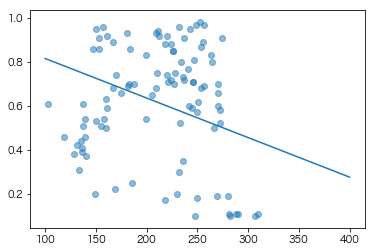

In [16]:
graph_scatter(data, b, m)